# Minimal model for parameter sweep + Monte Carlo runs

*Danilo Lessa Bernardineli*

The shortest model that has parameter sweeping and MC runs at the same time!

In [1]:
import numpy as np
from cadCAD.configuration import Experiment
from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import Configuration
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"
import seaborn as sns

In [2]:
MONTE_CARLO_RUNS = 10
SIMULATION_TIMESTEPS = 100

sys_params = {
    'parameter': [0.1, 0.5, 1.0]
}

genesis_states = {
    'something': 0
}

def p_something(params, 
                substep, 
                state_history, 
                prev_state):
    parameter = params['parameter']
    random_value_1 = np.random.randn() + parameter
    random_value_2 = np.random.rand() + parameter
    return {'policy_input_1': random_value_1,
            'policy_input_2': random_value_2}


def s_something(params, 
                substep, 
                state_history, 
                prev_state, 
                policy_input):
    new_value = policy_input['policy_input_1']
    new_value += policy_input['policy_input_2']
    return ('something', new_value)


partial_state_update_blocks = [
    {
        'policies': {
            'something': p_something
            
        },
        'variables': {
            'something': s_something
        }
    }
]

sim_config = {
    'N': MONTE_CARLO_RUNS,
    'T': range(SIMULATION_TIMESTEPS),
    'M': sys_params
}

In [3]:
sim_params = config_sim(sim_config)

exp = Experiment()
exp.append_configs(
    sim_configs=sim_params,
    initial_state=genesis_states,
    partial_state_update_blocks=partial_state_update_blocks
)

exec_mode = ExecutionMode()
local_mode_ctx = ExecutionContext(context=exec_mode.local_mode)

simulation = Executor(exec_context=local_mode_ctx,
                      configs=exp.configs)
raw_system_events, tensor_field, sessions = simulation.execute()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 3
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 1, 10, 1)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
SubsetIDs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Ns       : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ExpIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Execution Mode: parallelized
Total execution time: 0.27s


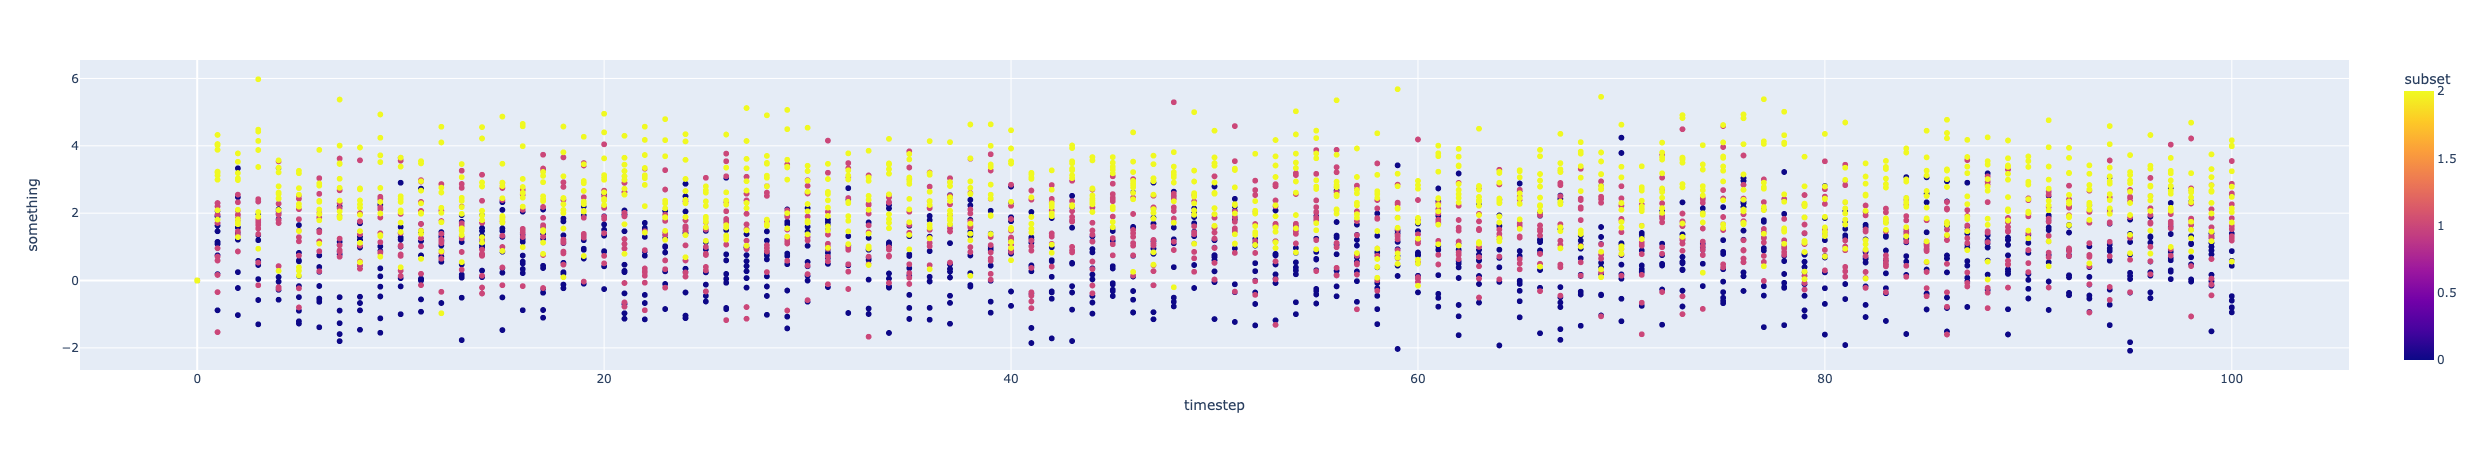

In [4]:
df = pd.DataFrame(raw_system_events)

px.scatter(df,
           x='timestep',
           y='something',
           color='subset')

<AxesSubplot:xlabel='timestep', ylabel='something'>

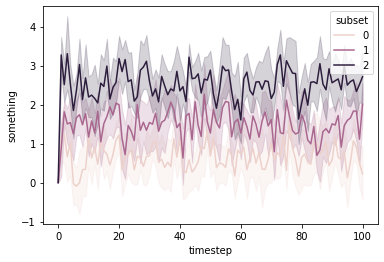

In [5]:
sns.lineplot(x=df.timestep, 
             y=df.something,
             hue=df.subset)